In [1]:
import sys
sys.path.insert(0, '../')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fsize = 10
params = {'legend.fontsize': fsize*0.925,          
          'axes.labelsize': fsize,
          'axes.titlesize':fsize*1.25,
          'xtick.labelsize':fsize*0.925,
          'ytick.labelsize':fsize }
sns.set(palette='pastel', rc=params)


import os
import numpy as np
import scipy.io as sio

import seaborn as sns

import utils
from analysis import analysis_funcs as af
from analysis import stats

from mpl_toolkits.axes_grid1 import ImageGrid
from scipy import misc

/home/arjundd/anaconda3/envs/tf_36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#FCN Generalizability Experiment
exp_names = ['original (V0)', 'midcrop1 (V1)', 'midcrop2 (V2)', 'nocrop (V3)']
test_folders = ['test_results', 'test_results_midcrop1', 'test_results_midcrop2', 'test_results_nocrop']

FCN
DSC
F-value: 24.3064
p-value: 0.0000
Dunn: 
               original (V0)  midcrop1 (V1)  midcrop2 (V2)  nocrop (V3)
original (V0)      -1.000000       0.000228       0.001039     1.000000
midcrop1 (V1)       0.000228      -1.000000       1.000000     0.015029
midcrop2 (V2)       0.001039       1.000000      -1.000000     0.047088
nocrop (V3)         1.000000       0.015029       0.047088    -1.000000

VOE
F-value: 24.3123
p-value: 0.0000
Dunn: 
               original (V0)  midcrop1 (V1)  midcrop2 (V2)  nocrop (V3)
original (V0)      -1.000000       0.000245        0.00099     1.000000
midcrop1 (V1)       0.000245      -1.000000        1.00000     0.015244
midcrop2 (V2)       0.000990       1.000000       -1.00000     0.043770
nocrop (V3)         1.000000       0.015244        0.04377    -1.000000

CV
F-value: 20.9337
p-value: 0.0001
Dunn: 
               original (V0)  midcrop1 (V1)  midcrop2 (V2)  nocrop (V3)
original (V0)      -1.000000       0.000731       0.009167     1.000000

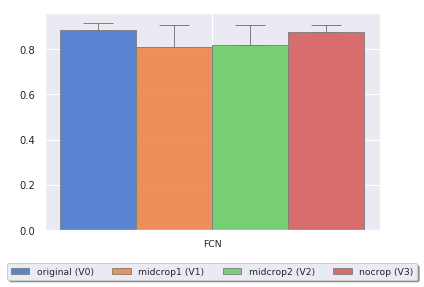

In [3]:
FCN_PATH1 = '/bmrNAS/people/arjun/msk_seg_networks/augment_limited/unet_2d/2018-11-07-16-05-15'
AKSHAY_UNET = '/bmrNAS/people/arjun/msk_seg_networks/architecture_limit/unet_2d/original_akshaysc'
AUG_UNET = '/bmrNAS/people/arjun/msk_seg_networks/architecture_limit/unet_2d/2018-11-26-00-56-55'
af.fcn_exp(FCN_PATH1, 'FCN', 'fcn-generalizability')

/home/arjundd/anaconda3/envs/tf_36/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


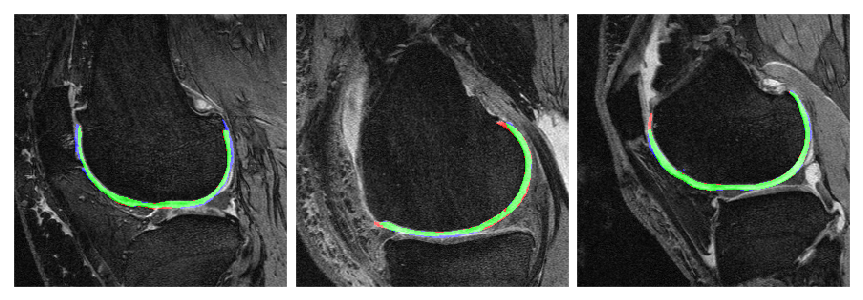

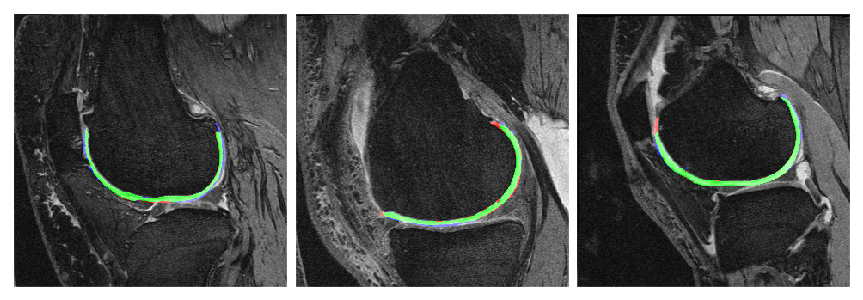

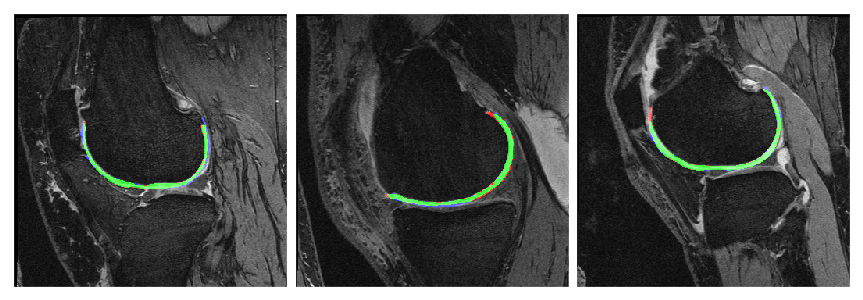

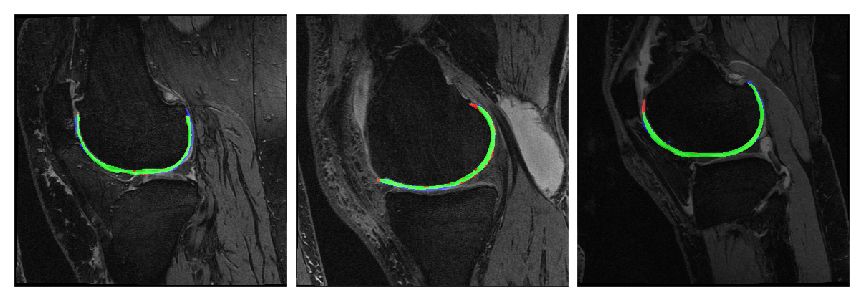

In [4]:
sub1 = '9968800_V00/055.png'
sub2 = '9912946_V00/055.png'
sub3 = '9993650_V01/055.png'

subs = [sub1, sub2, sub3]

def show_sub_ims(base_path, show_title=False):
    fig = plt.figure(1, (15, 15))

    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(1,3),  # creates 1 x 3 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )

    for i in range(len(subs)):
        sub = subs[i]
        im = misc.imread(os.path.join(base_path, 'im_ovlp', sub))
        grid[i].imshow(im)
        grid[i].grid(False)
        grid[i].set_xticks([])
        grid[i].set_yticks([])
        
        if show_title:
            sub_id = i + 1
            grid[i].set_title('Subject %d' % sub_id)

    plt.show()

for tfolder in test_folders:
    show_sub_ims(os.path.join(FCN_PATH1, tfolder))

Non-augmented
DSC
F-value: 24.3064
p-value: 0.0000
Dunn: 
               original (V0)  midcrop1 (V1)  midcrop2 (V2)  nocrop (V3)
original (V0)      -1.000000       0.000228       0.001039     1.000000
midcrop1 (V1)       0.000228      -1.000000       1.000000     0.015029
midcrop2 (V2)       0.001039       1.000000      -1.000000     0.047088
nocrop (V3)         1.000000       0.015029       0.047088    -1.000000

VOE
F-value: 24.3123
p-value: 0.0000
Dunn: 
               original (V0)  midcrop1 (V1)  midcrop2 (V2)  nocrop (V3)
original (V0)      -1.000000       0.000245        0.00099     1.000000
midcrop1 (V1)       0.000245      -1.000000        1.00000     0.015244
midcrop2 (V2)       0.000990       1.000000       -1.00000     0.043770
nocrop (V3)         1.000000       0.015244        0.04377    -1.000000

CV
F-value: 20.9337
p-value: 0.0001
Dunn: 
               original (V0)  midcrop1 (V1)  midcrop2 (V2)  nocrop (V3)
original (V0)      -1.000000       0.000731       0.009167   

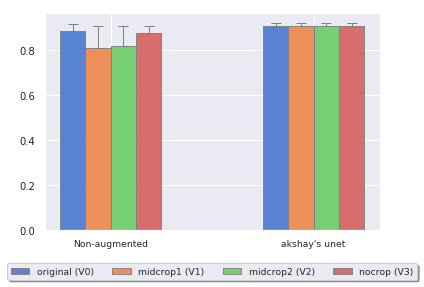

In [5]:
#FCN Generalizability Experiment - comparing non-augmented to Akshay fully trained
exp_names = ['original (V0)', 'midcrop1 (V1)', 'midcrop2 (V2)', 'nocrop (V3)']
test_folders = ['test_results', 'test_results_midcrop1', 'test_results_midcrop2', 'test_results_nocrop']

af.fcn_exp([FCN_PATH1, AKSHAY_UNET], ['Non-augmented', 'akshay\'s unet'], 'fcn-gen-aug-akshay-comparison')

Non-augmented
DSC
F-value: 24.3064
p-value: 0.0000
Dunn: 
               original (V0)  midcrop1 (V1)  midcrop2 (V2)  nocrop (V3)
original (V0)      -1.000000       0.000228       0.001039     1.000000
midcrop1 (V1)       0.000228      -1.000000       1.000000     0.015029
midcrop2 (V2)       0.001039       1.000000      -1.000000     0.047088
nocrop (V3)         1.000000       0.015029       0.047088    -1.000000

VOE
F-value: 24.3123
p-value: 0.0000
Dunn: 
               original (V0)  midcrop1 (V1)  midcrop2 (V2)  nocrop (V3)
original (V0)      -1.000000       0.000245        0.00099     1.000000
midcrop1 (V1)       0.000245      -1.000000        1.00000     0.015244
midcrop2 (V2)       0.000990       1.000000       -1.00000     0.043770
nocrop (V3)         1.000000       0.015244        0.04377    -1.000000

CV
F-value: 20.9337
p-value: 0.0001
Dunn: 
               original (V0)  midcrop1 (V1)  midcrop2 (V2)  nocrop (V3)
original (V0)      -1.000000       0.000731       0.009167   

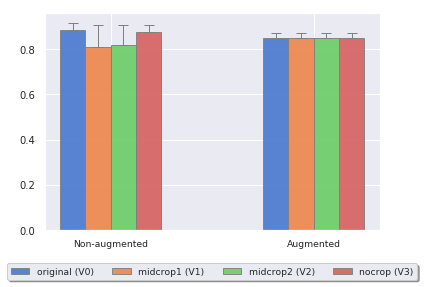

In [6]:
af.fcn_exp([FCN_PATH1, AUG_UNET], ['Non-augmented', 'Augmented'], 'fcn-gen-aug-comparison')